In [1]:
import farq
print('Farq is imported successfully')


Farq is imported successfully


In [2]:
# Define the full paths to the raster files
base_dir = r"chad lake"

# 1985 data
green_85, meta_85 = farq.read(farq.os.path.join(base_dir, "1985\LT05_L2SP_185051_19850501_20200918_02_T1_SR_B2.TIF"))
nir_85, _ = farq.read(farq.os.path.join(base_dir, "1985\LT05_L2SP_185051_19850501_20200918_02_T1_SR_B4.TIF"))

# 2024 data
green_24, meta_24 = farq.read(farq.os.path.join(base_dir, "2024 8\LC08_L2SP_185051_20230323_20230404_02_T1_SR_B3.TIF"))
nir_24, _ = farq.read(farq.os.path.join(base_dir, "2024 8\LC08_L2SP_185051_20230323_20230404_02_T1_SR_B5.TIF"))



In [3]:
# Print original shapes
print(f"\nOriginal shapes:")
print(f"1985 image: {green_85.shape}")
print(f"2024 image: {green_24.shape}")




Original shapes:
1985 image: (6931, 7761)
2024 image: (7771, 7611)


In [5]:
# Resample 2024 data to match 1985 dimensions
green_24 = farq.resample(green_24, green_85.shape) #ignore the warning
nir_24 = farq.resample(nir_24, nir_85.shape) #ignore the warning
print(f"1985 image: {green_85.shape}")
print(f"2024 image: {green_24.shape}")

1985 image: (6931, 7761)
2024 image: (6931, 7761)


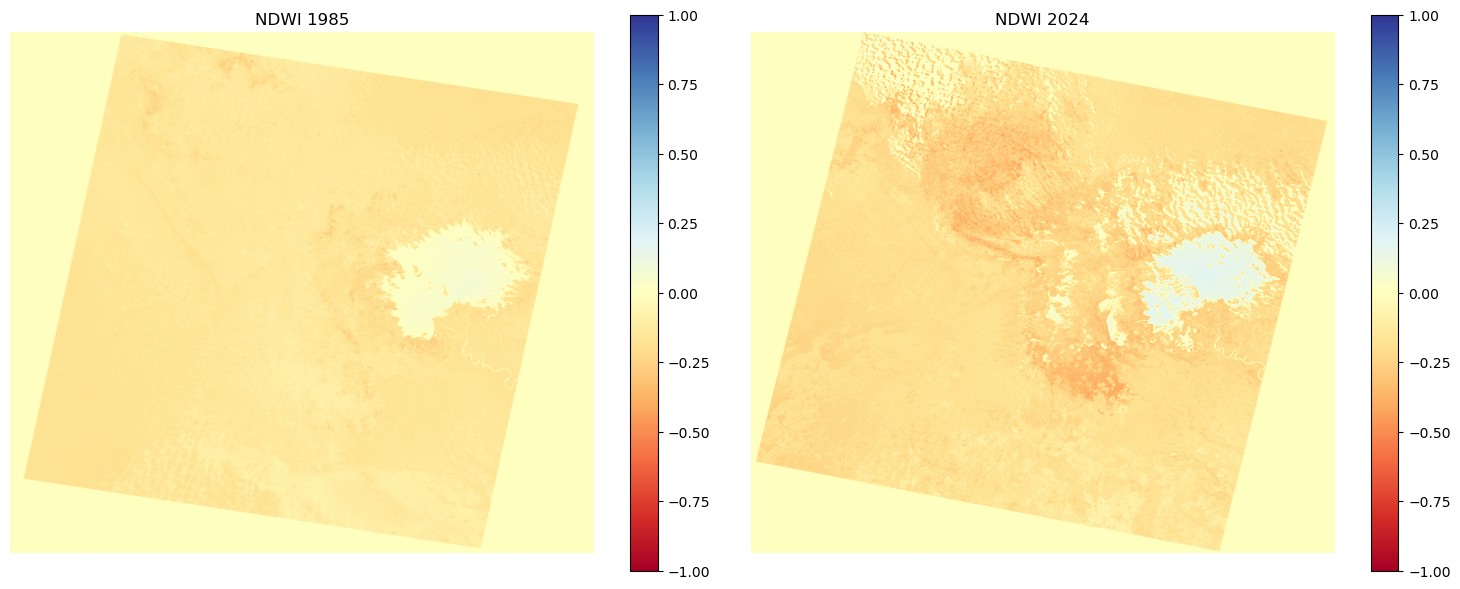

In [6]:
# Calculate NDWI for both periods
ndwi_85 = farq.ndwi(green_85, nir_85)
ndwi_24 = farq.ndwi(green_24, nir_24)

# Visualize NDWI results
farq.compare(
    ndwi_85, ndwi_24,
    title1="NDWI 1985",
    title2="NDWI 2024",
    cmap="RdYlBu",
    vmin=-1,
    vmax=1
)
farq.plt.show()

In [7]:
# Create water masks (NDWI > 0)
water_mask_85 = ndwi_85 > 0
water_mask_24 = ndwi_24 > 0

# Calculate basic water statistics
stats_85 = farq.water_stats(water_mask_85, pixel_size=30.0)
stats_24 = farq.water_stats(water_mask_24, pixel_size=30.0)

print("\n1985 Water Statistics:")
print(f"Total water area: {stats_85['total_area']:.2f} km²")
print(f"Water coverage: {stats_85['coverage_percent']:.2f}%")

print("\n2024 Water Statistics:")
print(f"Total water area: {stats_24['total_area']:.2f} km²")
print(f"Water coverage: {stats_24['coverage_percent']:.2f}%")


1985 Water Statistics:
Total water area: 1366.46 km²
Water coverage: 2.82%

2024 Water Statistics:
Total water area: 2694.36 km²
Water coverage: 5.57%



Change Statistics:
New water area: 1761.66 km²
Lost water area: 433.77 km²
Net change: 1327.89 km²
Percent change: 97.18%


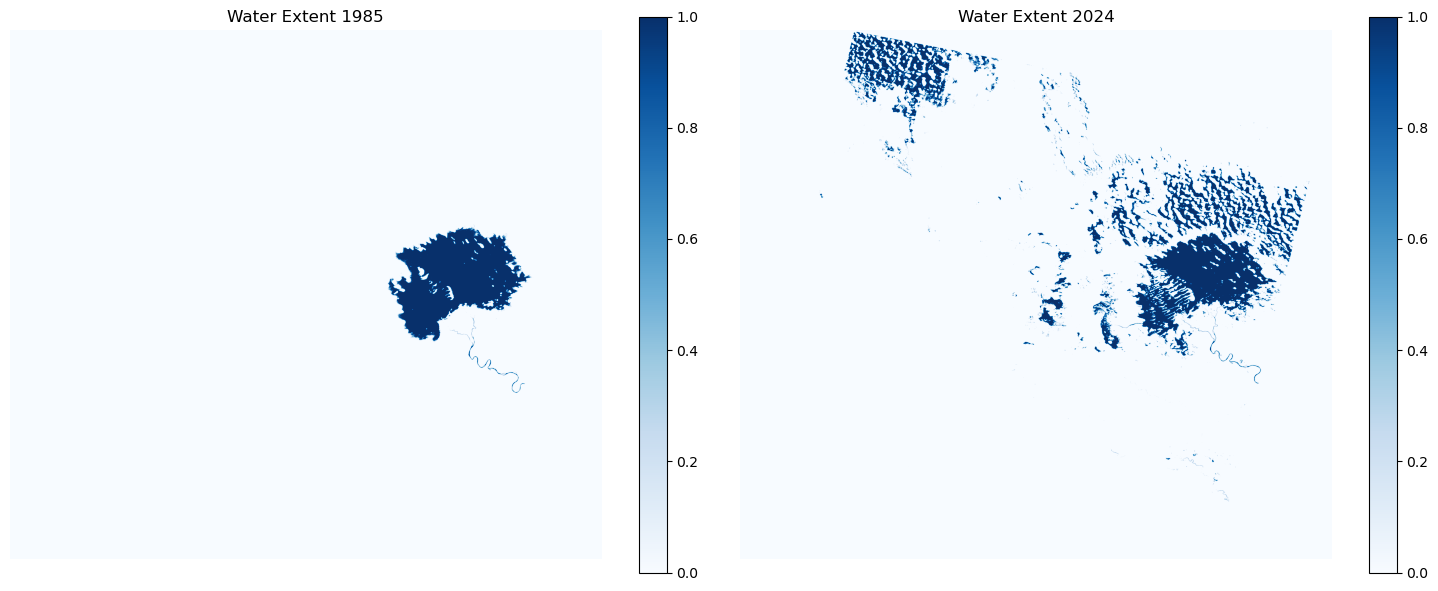

In [8]:

# Analyze changes between periods

changes = farq.water_change(water_mask_85, water_mask_24, pixel_size=30.0)

print("\nChange Statistics:")
print(f"New water area: {changes['gained_area']:.2f} km²")
print(f"Lost water area: {changes['lost_area']:.2f} km²")
print(f"Net change: {changes['net_change']:.2f} km²")
print(f"Percent change: {changes['change_percent']:.2f}%")

# Compare water masks
farq.compare(
    water_mask_85, water_mask_24,
    title1="Water Extent 1985",
    title2="Water Extent 2024",
    cmap="Blues",
    vmin=0,
    vmax=1
)
farq.plt.show()

In [11]:
# Get and analyze individual water bodies
labeled_85, areas_85 = farq.get_water_bodies(water_mask_85, pixel_size=30.0, min_area=9000)
labeled_24, areas_24 = farq.get_water_bodies(water_mask_24, pixel_size=30.0, min_area=9000)

# Print detailed water body statistics
print("\nDetailed Water Body Analysis:")
print("\n1985:")
print(f"Number of water bodies: {len(areas_85)}")
if areas_85:
    print(f"Average water body size: {farq.mean(list(areas_85.values())):.2f} km²")
    print(f"Largest water body: {farq.max(list(areas_85.values())):.2f} km²")

print("\n2024:")
print(f"Number of water bodies: {len(areas_24)}")
if areas_24:
    print(f"Average water body size: {farq.mean(list(areas_24.values())):.2f} km²")
    print(f"Largest water body: {farq.max(list(areas_24.values())):.2f} km²")



Detailed Water Body Analysis:

1985:
Number of water bodies: 115
Average water body size: 11.69 km²
Largest water body: 1343.74 km²

2024:
Number of water bodies: 1345
Average water body size: 0.43 km²
Largest water body: 511.49 km²


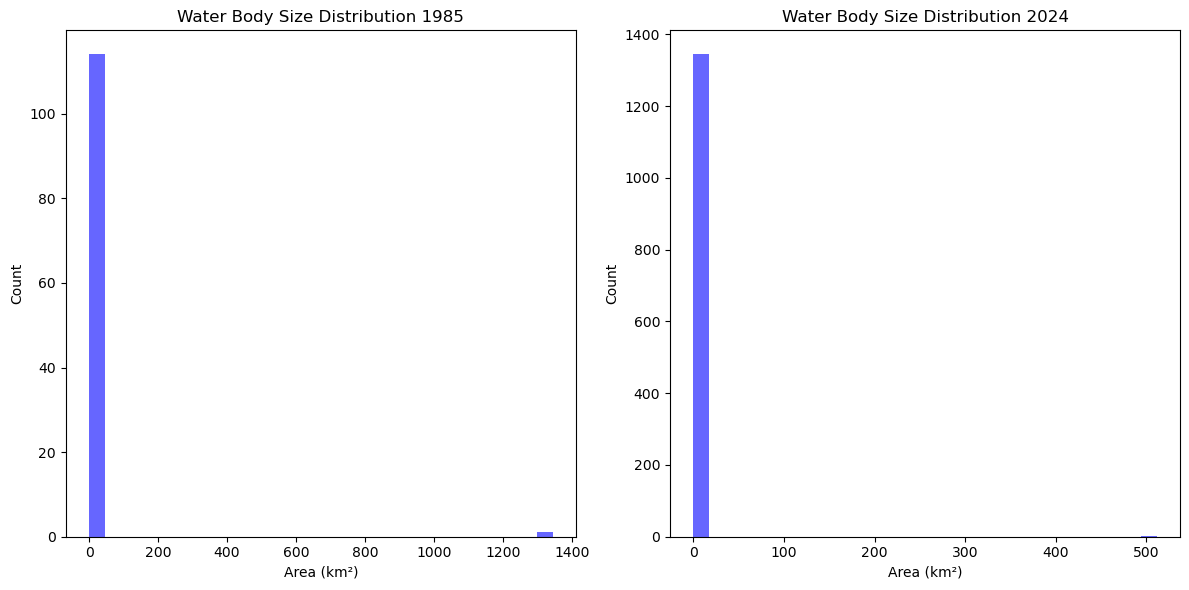

In [12]:
# Plot water body size distributions
if areas_85 and areas_24:
    farq.plt.figure(figsize=(12, 6))
    farq.plt.subplot(121)
    farq.plt.hist(list(areas_85.values()), bins=30, color='blue', alpha=0.6)
    farq.plt.title("Water Body Size Distribution 1985")
    farq.plt.xlabel("Area (km²)")
    farq.plt.ylabel("Count")
    
    farq.plt.subplot(122)
    farq.plt.hist(list(areas_24.values()), bins=30, color='blue', alpha=0.6)
    farq.plt.title("Water Body Size Distribution 2024")
    farq.plt.xlabel("Area (km²)")
    farq.plt.ylabel("Count")
    
    farq.plt.tight_layout()
    farq.plt.show()
